In [2]:
# A script to normalize energy demand. Using 18 degrees celsius as a base temperature, 
# we calculate degree days by taking the difference between the daily average temperature
# and the base temperature. Then we normalize electricity demand by dividing demand (AIL_demand)
# by the degree days in that hour 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
df = pd.read_csv("msa_merged_data.csv",index_col='BEGIN_DATE_GMT')
df.tail()

,HE,POOL_PRICE,AIL_DEMAND,Avg_temp,Weighted_Avg_Temp,future 1,future 2,future 3,future 4,WTI spot,dayofweek,month,year,holiday,workingday
BEGIN_DATE_GMT,,,,,,,,,,,,,,,
2020-12-30 19:00:00,13,35.10,10590.0,-3.225,-1.768968,61.80196,61.92965,62.019033,62.044571,61.597656,2,12,2020,0,1
2020-12-30 20:00:00,14,34.04,10519.0,-2.650,-1.299453,61.80196,61.92965,62.019033,62.044571,61.597656,2,12,2020,0,1
2020-12-30 21:00:00,15,34.77,10535.0,-2.050,-0.006591,61.80196,61.92965,62.019033,62.044571,61.597656,2,12,2020,0,1
2020-12-30 22:00:00,16,35.61,10598.0,-2.350,-0.833002,61.80196,61.92965,62.019033,62.044571,61.597656,2,12,2020,0,1
2020-12-30 23:00:00,17,37.92,10872.0,-2.800,-1.124149,61.80196,61.92965,62.019033,62.044571,61.597656,2,12,2020,0,1


In [17]:
# Using a base temperature of 18 degrees celsius, calculate CDD (Cooling Degree Days) and HDD (Heating Degree Days)
# by taking the difference between base and average temperature and multiply by the number of days. The data is hourly, 
# so it is multiplied by 1/24 days
base_temp = 18
degree_days = []
for value in df['Avg_temp']:
    if (value < base_temp) or (value > base_temp) :
      degree_days.append((base_temp - value)*(1/24))
    else :
      degree_days.append(0)   # if avg temp is the same as base temp, the CDD/HDD is 0

df['Degree_Days'] = degree_days
df.head()

,HE,POOL_PRICE,AIL_DEMAND,Avg_temp,Weighted_Avg_Temp,future 1,future 2,future 3,future 4,WTI spot,dayofweek,month,year,holiday,workingday,Degree-Days,Degree_Days,Normalized_AIL_Demand
BEGIN_DATE_GMT,,,,,,,,,,,,,,,,,,
2010-01-01 07:00:00,1,51.12,8307.0,-24.100,-22.952601,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,42.100,1.754167,197.315914
2010-01-01 08:00:00,2,48.79,8186.0,-23.775,-22.588126,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,41.775,1.740625,195.954518
2010-01-01 09:00:00,3,39.56,8075.0,-23.425,-22.339761,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,41.425,1.726042,194.930597
2010-01-01 10:00:00,4,36.27,8013.0,-23.000,-21.877969,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,41.000,1.708333,195.439024
2010-01-01 11:00:00,5,36.16,7982.0,-22.400,-21.527531,84.591078,85.224136,85.77417,86.261936,84.601456,4,1,2010,1,0,40.400,1.683333,197.574257


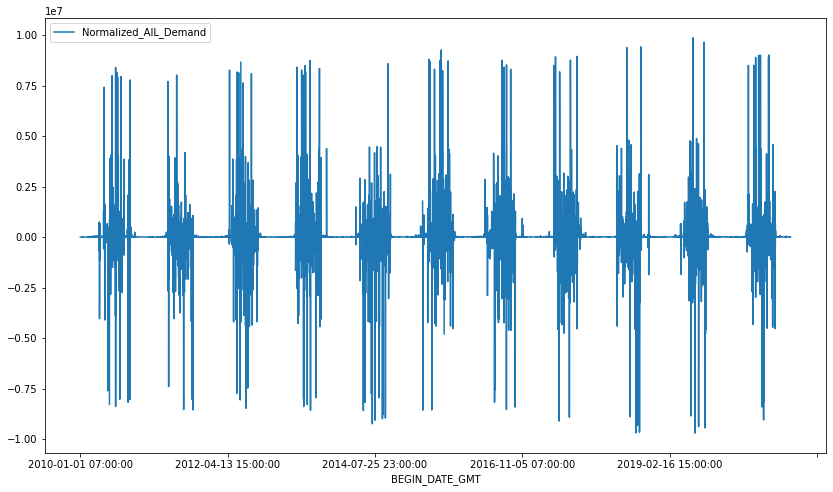

In [20]:
# Normalize electricity demand based on CDD and HDD
df['Normalized_AIL_Demand'] = df.AIL_DEMAND / df.Degree_Days

df.plot(figsize=(14,8) ,y='Normalized_AIL_Demand')